In [4]:
import pandas as pd

df = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/Academics/3rd Year/5th Sem/Academic Related Docs/Junaid's Intership Tasks/Task02/sales_data.csv")

df.head()


,Product,Region,Sales,Profit,Discount,Category,Date
0,Laptop,North,2000,200,0.10,Technology,2024-01-31
1,Printer,South,1500,180,0.20,Office Supplies,2024-02-29
2,Tablet,East,1200,150,0.15,Technology,2024-03-31
3,Monitor,West,1000,100,0.05,Technology,2024-04-30
4,Chair,North,800,90,0.10,Furniture,2024-05-31


In [5]:
print("Dataset shape:", df.shape)

print("\nColumn data types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())


Dataset shape: (10, 7)

Column data types:
Product      object
Region       object
Sales         int64
Profit        int64
Discount    float64
Category     object
Date         object
dtype: object

Missing values:
Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64


### Step 01: Load and Preview the Dataset

In this step, I imported the `sales_data.csv` file using pandas. I checked the first few rows using `head()`, confirmed that the dataset has 10 rows and 7 columns, and verified that there are no missing values.

The data includes information such as Product, Region, Sales, Profit, Discount, Category, and Date — which we’ll use to perform analysis and predictions in the next steps.


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values(by='Date')

print("Updated column types:")
print(df.dtypes)

df.head()


Updated column types:
Product             object
Region              object
Sales                int64
Profit               int64
Discount           float64
Category            object
Date        datetime64[ns]
dtype: object


,Product,Region,Sales,Profit,Discount,Category,Date
0,Laptop,North,2000,200,0.10,Technology,2024-01-31
1,Printer,South,1500,180,0.20,Office Supplies,2024-02-29
2,Tablet,East,1200,150,0.15,Technology,2024-03-31
3,Monitor,West,1000,100,0.05,Technology,2024-04-30
4,Chair,North,800,90,0.10,Furniture,2024-05-31


### Step 02: Clean and Prepare the Dataset

In this step, I converted the `Date` column into proper datetime format using `pd.to_datetime()`.  
Then I sorted the data by date to help with time-based visualizations later.

This prepares the dataset for trend analysis in upcoming steps.


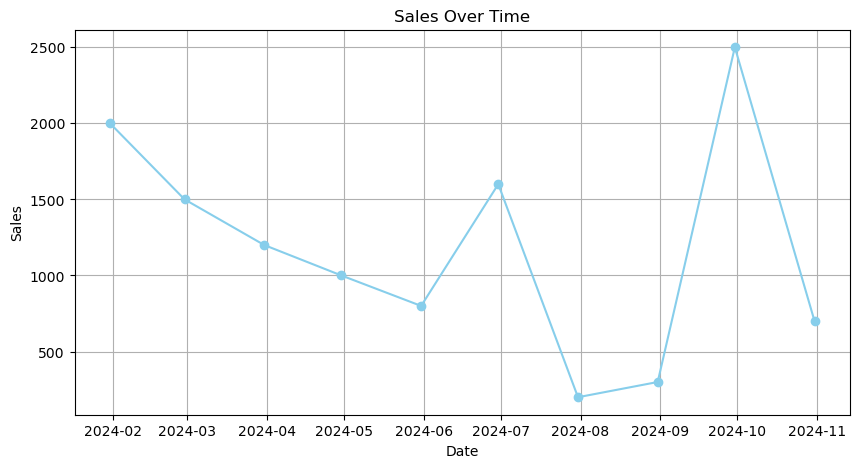

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(df['Date'], df['Sales'], marker='o', color='skyblue')

plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)

plt.show()


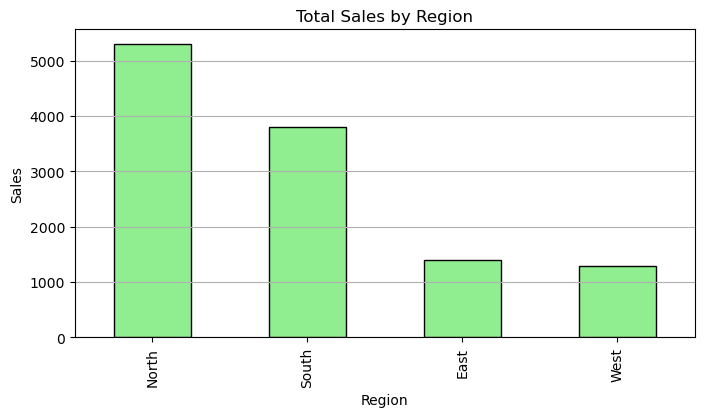

In [11]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

region_sales.plot(kind='bar', color='lightgreen', edgecolor='black', figsize=(8, 4))
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.grid(axis='y')
plt.show()


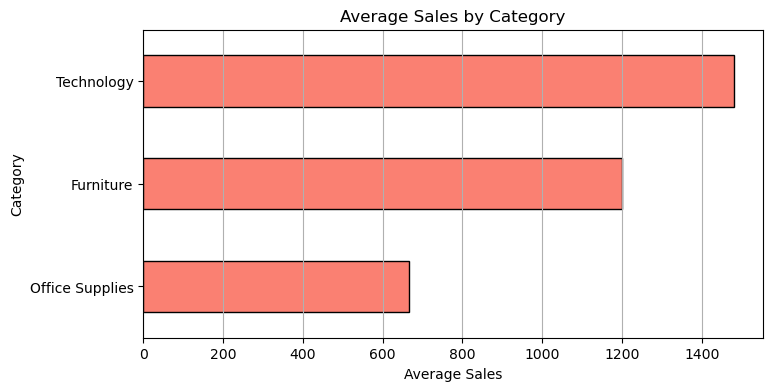

In [12]:
category_sales = df.groupby('Category')['Sales'].mean().sort_values()

category_sales.plot(kind='barh', color='salmon', edgecolor='black', figsize=(8, 4))
plt.title("Average Sales by Category")
plt.xlabel("Average Sales")
plt.ylabel("Category")
plt.grid(axis='x')
plt.show()


#### Sales Over Time
This line chart shows how sales changed over the given time period.

#### Total Sales by Region
This bar chart compares total sales in each region. Useful for identifying top-performing regions.

#### Average Sales by Category
This horizontal bar chart shows the average sales per category, helping to highlight which product types sell better on average.


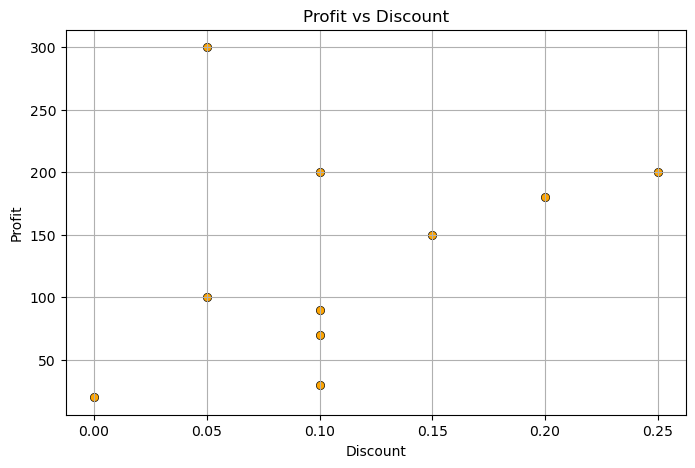

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.scatterplot(x='Discount', y='Profit', data=df, color='orange', edgecolor='black')

plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)

plt.show()


#### Profit vs Discount

This scatter plot shows the relationship between discounts and profit.  
It helps to identify if offering higher discounts negatively affects profitability.

From the plot, we can try to observe whether there's a trend where increasing discounts result in lower profits — which is common in sales analytics.


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
X = df[['Profit', 'Discount']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared Score (R²):", r2_score(y_test, y_pred))

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted Sales:")
print(results)


Mean Squared Error (MSE): 123533.04393900596
R-squared Score (R²): 0.5058678242439761

Actual vs Predicted Sales:
   Actual    Predicted
8    2500  2996.517702
1    1500  1523.157284


### Step 05: Build a Sales Prediction Model

I used a Linear Regression model from scikit-learn to predict Sales using Profit and Discount as features.

After splitting the data into training and test sets, I trained the model and evaluated its accuracy using:
- **Mean Squared Error (MSE)**: Measures average error size
- **R-squared Score (R²)**: Tells how well the model explains variation in sales

Finally, I compared the predicted sales with the actual sales.
